In [1]:
from related_posts_generator import Post, get_all_posts
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import umap
from pathlib import Path
from tqdm.notebook import trange, tqdm
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
import nltk
import numpy as np
# from multiprocessing import Pool
from concurrent.futures import ThreadPoolExecutor
import time

nltk.download("punkt")
%matplotlib widget

[nltk_data] Downloading package punkt to /home/wint3rmute/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [9]:
def get_all_posts_oscean() -> list[Post]:
    all_posts_paths = Path.glob(Path("/home/wint3rmute/oscean/site/"), "**/*.html")
    all_posts_paths = [path for path in all_posts_paths]

    with ThreadPoolExecutor() as p:
        all_posts = list(tqdm(p.map(Post.from_path, all_posts_paths), total=len(all_posts_paths)))
        return all_posts

all_posts = get_all_posts_oscean()

  0%|          | 0/455 [00:00<?, ?it/s]

[WARNING] Could not fetch resource ../etc/ski.html: Could not fetch ../etc/ski.html
  InvalidUrlException "../etc/ski.html" "Invalid URL"
[WARNING] Could not fetch resource ../etc/1th.c.txt: Could not fetch ../etc/1th.c.txt
  InvalidUrlException "../etc/1th.c.txt" "Invalid URL"
[WARNING] Could not fetch resource ../etc/color9.c.txt: Could not fetch ../etc/color9.c.txt
  InvalidUrlException "../etc/color9.c.txt" "Invalid URL"
[WARNING] Could not fetch resource ../etc/spacetime.s.txt: Could not fetch ../etc/spacetime.s.txt
  InvalidUrlException "../etc/spacetime.s.txt" "Invalid URL"
[WARNING] Could not fetch resource ../etc/unicycle/index.html: Could not fetch ../etc/unicycle/index.html
  InvalidUrlException "../etc/unicycle/index.html" "Invalid URL"
[WARNING] Could not fetch resource ../etc/ski.html: Could not fetch ../etc/ski.html
  InvalidUrlException "../etc/ski.html" "Invalid URL"
[WARNING] Could not fetch resource ../etc/clock9.c.txt: Could not fetch ../etc/clock9.c.txt
  InvalidUr

took 30.20612144470215


TypeError: unhashable type: 'list'

In [11]:
# all_posts[1]

In [12]:
def custom_tokenizer(text: str) -> list[str]:
    stemmer = SnowballStemmer("english")
    words = word_tokenize(text) 
    
    return [stemmer.stem(word) for word in words]

In [13]:

# Vectorizer to convert a collection of raw documents to a matrix of TF-IDF features
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)

# Learn vocabulary and idf, return term-document matrix.
tfidf = vectorizer.fit_transform([post.content for post in all_posts])

umap_result = umap.UMAP().fit_transform(
    tfidf
)

In [14]:
sorted(list(vectorizer.vocabulary_.keys()))[:30]

['!',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 "'/",
 "'d",
 "'m",
 "'n",
 "'s",
 "'t",
 "'|",
 '(',
 ')',
 '*',
 '+',
 '++',
 '+++',
 '++i',
 '++n',
 '++x',
 '+-/',
 '+00',
 '+01',
 '+1',
 '+127',
 '+163,8',
 '+5']

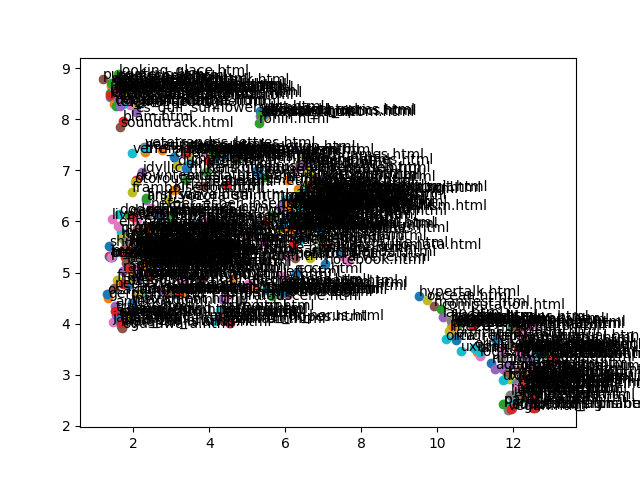

In [15]:
plt.close()

from itertools import count
import random
# index = count()
for post, post_position, post_index in zip(all_posts, umap_result, count()):
    plt.scatter(post_position[0], post_position[1])
    
    # if random.choice([1,2]) == 1:
    plt.annotate(post.title, post_position, post_position)

plt.show()